<a href="https://colab.research.google.com/github/leonardo-vinicius/Mini-projeto-Data-Science/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mini projeto de ciência de dados
  - análise e interpretação de dados em python
  - construção de gráficos
  - base de dados escolhida: cidades com o custo de vida saudável 2021

link para base de dados: https://www.kaggle.com/datasets/prasertk/healthy-lifestyle-cities-report-2021

In [ ]:
# Importação dos módulos
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# Carregamento dos dados
dados = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/projeto-katie/healthy_lifestyle_city_2021.csv')

In [ ]:
# traduzindo as colunas
dados.rename(columns = {'City':'Cidade', 'Sunshine hours(City)':'Horas de sol(cidade)','Cost of a bottle of water(City)':'Custo de uma garrafa de água(cidade)', 
'Obesity levels(Country)': 'Nível de obesidade(país)', 'Life expectancy(years) (Country)':'Expectativa de vida(país)', 'Pollution(Index score) (City)':'Nível de poluição(cidade)',
'Annual avg. hours worked':'Horas trabalhadas anuais', 'Happiness levels(Country)':'Nível de felicidade(país)', 'Outdoor activities(City)':'Horas ao ar livre(cidade)',
'Number of take out places(City)':'N° de lugares para visitar(cidade)', 'Cost of a monthly gym membership(City)':'Custo 1 mes academia(cidade)'}, inplace = True)
data_frame = pd.DataFrame(dados)
print(data_frame.columns)

In [ ]:
# análise inicial dos dados
dados.head(10)

,Cidade,Rank,Horas de sol(cidade),Custo de uma garrafa de água(cidade),Nível de obesidade(país),Expectativa de vida(país),Nível de poluição(cidade),Horas trabalhadas anuais,Nível de felicidade(país),Horas ao ar livre(cidade),N° de lugares para visitar(cidade),Custo 1 mes academia(cidade)
0,Amsterdam,1,1858,£1.92,20.40%,81.2,30.93,1434,7.44,422,1048,£34.90
1,Sydney,2,2636,£1.48,29.00%,82.1,26.86,1712,7.22,406,1103,£41.66
2,Vienna,3,1884,£1.94,20.10%,81.0,17.33,1501,7.29,132,1008,£25.74
3,Stockholm,4,1821,£1.72,20.60%,81.8,19.63,1452,7.35,129,598,£37.31
4,Copenhagen,5,1630,£2.19,19.70%,79.8,21.24,1380,7.64,154,523,£32.53
5,Helsinki,6,1662,£1.60,22.20%,80.4,13.08,1540,7.80,113,309,£35.23
6,Fukuoka,7,2769,£0.78,4.30%,83.2,-,1644,5.87,35,539,£55.87
7,Berlin,8,1626,£1.55,22.30%,80.6,39.41,1386,7.07,254,1729,£26.11
8,Barcelona,9,2591,£1.19,23.80%,82.2,65.19,1686,6.40,585,2344,£37.80
9,Vancouver,10,1938,£1.08,29.40%,81.7,24.26,1670,7.23,218,788,£31.04


In [ ]:
# mostrando o tipo dos dados antes de futuras transformações
dados.info()

In [ ]:
# Tratamento de dados

# Rank não faz sentido já que os países estão em ordem, nos gráficos não dava para analisar
# então decidi remover
deletar = set(dados.columns) - {'Rank'}
dados1 = dados[list(deletar)]

# transformando colunas que eram objeto em float e int
# essas colunas representam valores, mas por alguns símbolos se tornaram objeto
# então as transformei
dados1['Custo de uma garrafa de água(cidade)'] = dados1['Custo de uma garrafa de água(cidade)'].str.replace('£','')
dados1['Custo 1 mes academia(cidade)'] = dados1['Custo 1 mes academia(cidade)'].str.replace('£','')
dados1['Horas trabalhadas anuais'] = dados1['Horas trabalhadas anuais'].str.replace('-','0')
dados1['Nível de poluição(cidade)'] = dados1['Nível de poluição(cidade)'].str.replace('-','0')
dados1['Horas de sol(cidade)'] = dados1['Horas de sol(cidade)'].str.replace('-','0')
dados1['Nível de obesidade(país)'] = dados1['Nível de obesidade(país)'].str.replace('%','')

dados1['Custo de uma garrafa de água(cidade)'] = dados1['Custo de uma garrafa de água(cidade)'].astype('float')
dados1['Custo 1 mes academia(cidade)'] = dados1['Custo 1 mes academia(cidade)'].astype('float')
dados1['Nível de poluição(cidade)'] = dados1['Nível de poluição(cidade)'].astype('float')
dados1['Nível de obesidade(país)'] = dados1['Nível de obesidade(país)'].astype('float')
dados1['Horas trabalhadas anuais'] = dados1['Horas trabalhadas anuais'].astype('int')
dados1['Horas de sol(cidade)'] = dados1['Horas de sol(cidade)'].astype('int')

In [ ]:
# para saber o tipo de dados das colunas
# lembrando que o conjunto de dados agora é 'dados1' não mais 'dados'
dados1.info()

In [ ]:
# Análises e Visualização
# histograma geral dos dados
dados1.hist(bins = 20, figsize=(10, 10), color = 'b');

In [ ]:
# boxplot de n° de lugares para visitar
dados1.boxplot(column=['N° de lugares para visitar(cidade)'])
plt.rcParams["figure.figsize"] = (8, 6);
plt.rcParams["figure.facecolor"] = 'white';
plt.show()

print('\n')
dados1.boxplot(column=['Expectativa de vida(país)'])
plt.show()

print('\n')
dados1.boxplot(column=['Nível de felicidade(país)'])
plt.show()

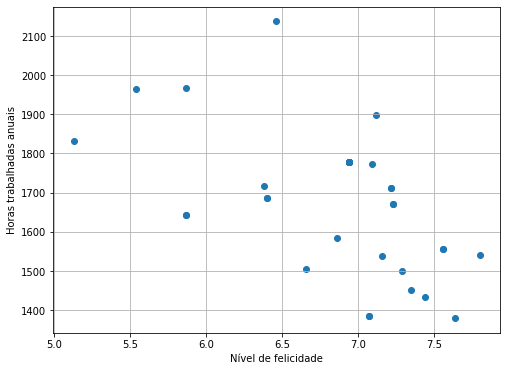

In [ ]:
dados2 = dados1.copy()
dados2.drop(dados2[dados2['Horas trabalhadas anuais'] == 0].index, inplace = True)

felicidade = dados2['Nível de felicidade(país)']
horas_trabalhadas = dados2['Horas trabalhadas anuais']
plt.scatter(felicidade, horas_trabalhadas)
plt.grid(True)
plt.xlabel('Nível de felicidade')
plt.ylabel('Horas trabalhadas anuais')
plt.show()

# dados2['Horas trabalhadas anuais']
# percebe-se com a vizualização desses dados, quanto maior o nível de felicidade do país, menor são
# as horas trabalhadas anualmente.

cidades com o custo de vida saudável 2021 por continentes



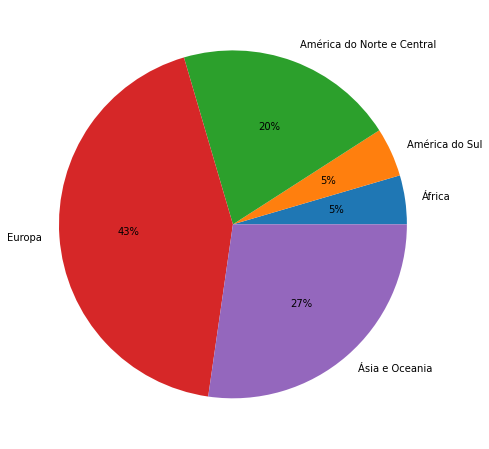

In [ ]:
asia_e_oceania = ['Sydney', 'Fukuoka', 'Melbourne', 'Beijing', 'Bangkok', 'Jakarta', 'Seoul','Taipei', 'Mumbai', 'Tokyo', 'Hong Kong', 'Shanghai']
europa = ['Amsterdam', 'Vienna', 'Stockholm', 'Copenhagen', 'Helsinki', 'Berlin', 'Barcelona', 'Madrid', 'Frankfurt', 'Geneva', 'Tel Aviv', 'Istanbul', 'Dublin', 'Brussels', 'Paris','Zurich', 'London', 'Milan', 'Moscow']
am_sul = ['Buenos Aires', 'Sao Paulo']
am_norte_e_central = ['Vancouver', 'Toronto', 'Los Angeles', 'Boston', 'Chicago','San Francisco', 'Washington, D.C.', 'New York', 'Mexico City']
africa = ['Cairo', 'Johannesburg']

continentes = ['África', 'América do Sul', 'América do Norte e Central', 'Europa', 'Ásia e Oceania']
qtd_de_paises = [len(africa), len(am_sul), len(am_norte_e_central), len(europa), len(asia_e_oceania)]
plt.rcParams["figure.figsize"] = (12, 8)
plt.figure(facecolor='white')
print("Cidades com o custo de vida saudável 2021 por continentes\n")
plt.pie(qtd_de_paises, labels = continentes, autopct= '%.lf%%')
plt.show()